# Ames Training Dataset EDA and Cleaning

In [4159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4160]:
# Read in train dataset
ames_train = pd.read_csv('./datasets/train.csv')

In [4161]:
ames_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4162]:
ames_train.shape

(2051, 81)

In [4163]:
ames_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [4164]:
# Dropping the following columns for the ames dataframe due to their perceived lack of weight/significance
# or having too many null values

drop_features = ['Id', 'PID', 'Lot Frontage', 'Street', 'Alley', 'Lot Shape', 'House Style', 'Year Built', 'Roof Style', 
                 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Exposure', 
                 'BsmtFin Type 2', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Heating', 'Electrical', 'Low Qual Fin SF', 
                 'Functional', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
                 'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', '1st Flr SF', '2nd Flr SF', 'Condition 2', 
                 'Kitchen AbvGr', 'Foundation', 'Yr Sold', '3Ssn Porch', 'Screen Porch', 'Enclosed Porch', 'Wood Deck SF',
                  'Lot Area', 'Year Remod/Add', 'Garage Qual', 'Garage Cond', 'Bsmt Cond', 'Exter Cond',
                 'Fireplace Qu', 'Central Air', 'Open Porch SF', 'Fireplaces', 'Pool QC', 'Pool Area']
           
ames_train = ames_train.drop(columns= drop_features)

In [4165]:
ames_train.shape

(2051, 28)

In [4166]:
# Checking for null values
ames_train.isnull().sum()

MS SubClass        0
MS Zoning          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Bldg Type          0
Overall Qual       0
Overall Cond       0
Exter Qual         0
Bsmt Qual         55
BsmtFin Type 1    55
Total Bsmt SF      1
Heating QC         0
Gr Liv Area        0
Bsmt Full Bath     2
Bsmt Half Bath     2
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Garage Area        1
Paved Drive        0
Sale Type          0
SalePrice          0
dtype: int64

In [4167]:
# It appears np.nan values are appearing for rows with 0 basements
ames_train.loc[ames_train['Bsmt Qual'].isna() == True, ['Total Bsmt SF', 'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Full Bath', 'Bsmt Half Bath']].head()

,Total Bsmt SF,BsmtFin Type 1,Bsmt Qual,Bsmt Full Bath,Bsmt Half Bath
12,0.0,NaN,NaN,0.0,0.0
93,0.0,NaN,NaN,0.0,0.0
114,0.0,NaN,NaN,0.0,0.0
146,0.0,NaN,NaN,0.0,0.0
183,0.0,NaN,NaN,0.0,0.0


In [4168]:
# I'm assuming np.nan values are appearing for the row if garage area is 0
ames_train.loc[ames_train['Garage Area'].isna() == True, ['Garage Area']].head()

,Garage Area
1712,NaN


In [4169]:
# Replacing NaaN values in BsmtFin Type 1 and Bsmt Qual with the 'Na' 
# characters, then Total BsmtFin SF + full/half bath, and Garage Area with 0.0. 
ames_train['BsmtFin Type 1'] = ames_train['BsmtFin Type 1'].replace(np.nan, 'Na')
ames_train['Bsmt Qual'] = ames_train['Bsmt Qual'].replace(np.nan, 'Na')
ames_train['Total Bsmt SF'] = ames_train['Total Bsmt SF'].replace(np.nan, 0.0)
ames_train['Bsmt Full Bath'] = ames_train['Bsmt Full Bath'].replace(np.nan, 0.0)
ames_train['Bsmt Half Bath'] = ames_train['Bsmt Half Bath'].replace(np.nan, 0.0)
ames_train['Garage Area'] = ames_train['Garage Area'].replace(np.nan, 0.0)

In [4170]:
# No more null values
ames_train.isnull().sum()

MS SubClass       0
MS Zoning         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Bldg Type         0
Overall Qual      0
Overall Cond      0
Exter Qual        0
Bsmt Qual         0
BsmtFin Type 1    0
Total Bsmt SF     0
Heating QC        0
Gr Liv Area       0
Bsmt Full Bath    0
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Garage Area       0
Paved Drive       0
Sale Type         0
SalePrice         0
dtype: int64

In [4171]:
# MS SubClass should be categorical even though it contains numerical values. 
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS SubClass     2051 non-null   int64  
 1   MS Zoning       2051 non-null   object 
 2   Land Contour    2051 non-null   object 
 3   Utilities       2051 non-null   object 
 4   Lot Config      2051 non-null   object 
 5   Land Slope      2051 non-null   object 
 6   Neighborhood    2051 non-null   object 
 7   Condition 1     2051 non-null   object 
 8   Bldg Type       2051 non-null   object 
 9   Overall Qual    2051 non-null   int64  
 10  Overall Cond    2051 non-null   int64  
 11  Exter Qual      2051 non-null   object 
 12  Bsmt Qual       2051 non-null   object 
 13  BsmtFin Type 1  2051 non-null   object 
 14  Total Bsmt SF   2051 non-null   float64
 15  Heating QC      2051 non-null   object 
 16  Gr Liv Area     2051 non-null   int64  
 17  Bsmt Full Bath  2051 non-null   f

In [4172]:
print(ames_train['Full Bath'].describe())
print()
print(ames_train['Half Bath'].describe())

count    2051.000000
mean        1.577279
std         0.549279
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Full Bath, dtype: float64

count    2051.000000
mean        0.371039
std         0.501043
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Half Bath, dtype: float64


In [4173]:
# Creating new columns that sum the total for bathrooms, beds/baths, and living area
ames_train['tot_baths'] = ames_train['Full Bath'] + (ames_train['Half Bath']*0.5)
ames_train.drop(columns=['Full Bath', 'Half Bath'], inplace=True)

ames_train['tot_bed_bath'] = ames_train['tot_baths'] + ames_train['Bedroom AbvGr']
ames_train['tot_liv_area'] = ames_train['Total Bsmt SF'] + ames_train['Gr Liv Area']

In [4174]:
# Converting 'quality' category columns into ordinal number values 
# Kovacs shared some of this code with me

qual_map = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}
qual_cols = ["Exter Qual", "Exter Cond", "Bsmt Qual", "Bsmt Cond", "Kitchen Qual", 
             "Fireplace Qu", "Garage Qual", "Garage Cond", "Pool QC"]

for i in ames_train.columns:
    if i in qual_cols:
        ames_train[i] = ames_train[i].map(qual_map)
        pd.to_numeric(arg=ames_train[i], errors="coerce")
    ames_train[i] = ames_train[i].replace(np.nan, 0.0)

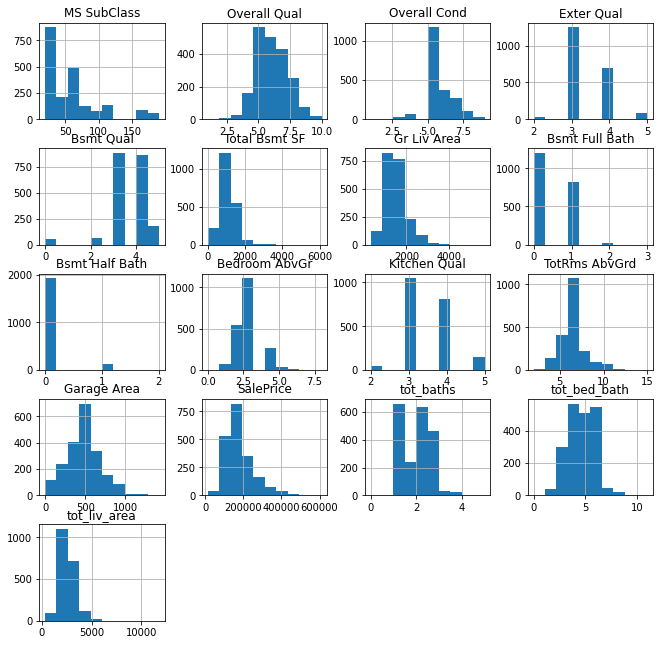

In [4175]:
# Producing histograms for all numerical values
ames_train[ames_train.dtypes[(ames_train.dtypes=="float64")|(ames_train.dtypes=="int64")].index.values].hist(figsize=[11,11]);

I had run the histogram code above with more dataset columns before and found heavily skewed distributions for the following: porch-related columns, lot area, year remod/added, pool-related columns, garage quality/condition, basement condition, exterior condition, and fireplace-related columns. I went back to the top of the notebook afterwards to drop these columns, which is why they don't appear now. 

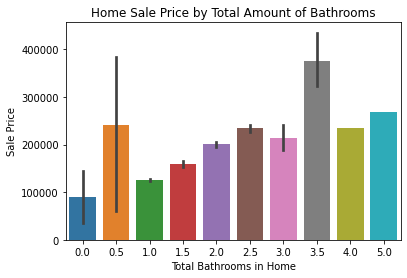

In [4176]:
# Total baths is slightly correlative with sale price.
sns.barplot(x = ames_train['tot_baths'], y=ames_train['SalePrice'])
plt.title('Home Sale Price by Total Amount of Bathrooms')
plt.xlabel('Total Bathrooms in Home')
plt.ylabel('Sale Price');

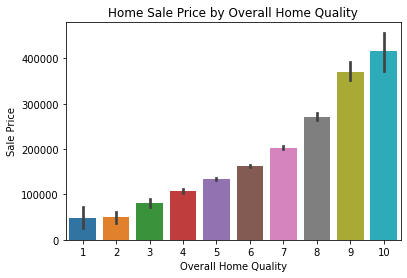

In [4177]:
# Overall Quality is highly correlative with sale price
sns.barplot(x = ames_train['Overall Qual'], y=ames_train['SalePrice'])
plt.title('Home Sale Price by Overall Home Quality')
plt.xlabel('Overall Home Quality')
plt.ylabel('Sale Price');

In [4178]:
ames_train['Condition 1'].value_counts()

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

In [4179]:
# Condition 2 was dropped, so renaming Condition 1 to Condition
ames_train.rename(columns={'Condition 1': 'Condition'}, inplace=True)

In [4181]:
# Grouping condition values related to railroads and positives 
for i in range(len(ames_train['Condition'])):
    if ames_train['Condition'][i] == 'RRNn' or ames_train['Condition'][i] == 'RRNe':
        ames_train['Condition'][i] = 'RRN' 
    elif ames_train['Condition'][i] == 'RRAn' or ames_train['Condition'][i] == 'RRAe':
        ames_train['Condition'][i] = 'RRA'
    elif ames_train['Condition'][i] == 'Artery' or ames_train['Condition'][i] == 'Feedr':
        ames_train['Condition'][i] = 'Street'
    elif ames_train['Condition'][i] == 'PosN' or ames_train['Condition'][i] == 'PosA':
        ames_train['Condition'][i] = 'Pos'

### Removing Outlier Values

In [4182]:
bsmt_area_high = ames_train['Total Bsmt SF'].quantile(.999)
bsmt_area_high

3205.7000000000016

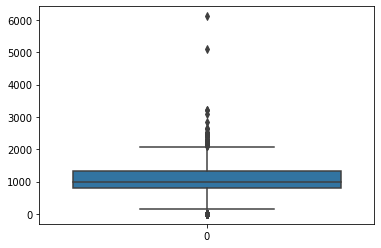

In [4183]:
sns.boxplot(data=ames_train['Total Bsmt SF']);

In [4184]:
gr_liv_area_high = ames_train['Gr Liv Area'].quantile(.999)
gr_liv_area_high

3812.6000000000404

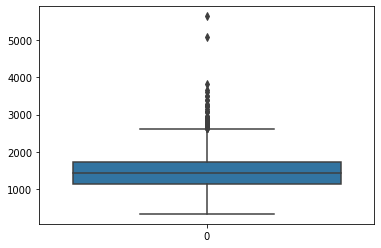

In [4185]:
sns.boxplot(data=ames_train['Gr Liv Area']);

In [4186]:
garage_area_high = ames_train['Garage Area'].quantile(.999)
garage_area_high

1346.3000000000093

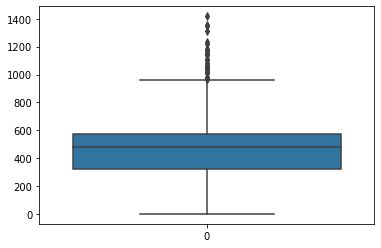

In [4187]:
sns.boxplot(data=ames_train['Garage Area']);

In [4188]:
tot_liv_area = ames_train['tot_liv_area'].quantile(.999)
tot_liv_area

6383.700000000242

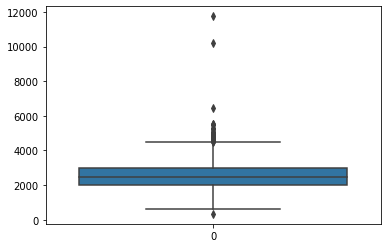

In [4189]:
sns.boxplot(data=ames_train['tot_liv_area']);

In [4190]:
# Removing outlier rows (values higher than the top .1%)
# for Total Bsmt SF, Gr Liv Area, Garage Area, and tot_liv_area
ames_train = ames_train[(ames_train['Total Bsmt SF'] < bsmt_area_high)]
ames_train = ames_train[(ames_train['Total Bsmt SF'] < bsmt_area_high)]
ames_train = ames_train[(ames_train['Gr Liv Area'] < gr_liv_area_high)]
ames_train = ames_train[(ames_train['Garage Area'] < garage_area_high)]
ames_train = ames_train[(ames_train['tot_liv_area'] < tot_liv_area)]

Above quantile code to identify outliers was learned from this stack overflow [page](https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame)

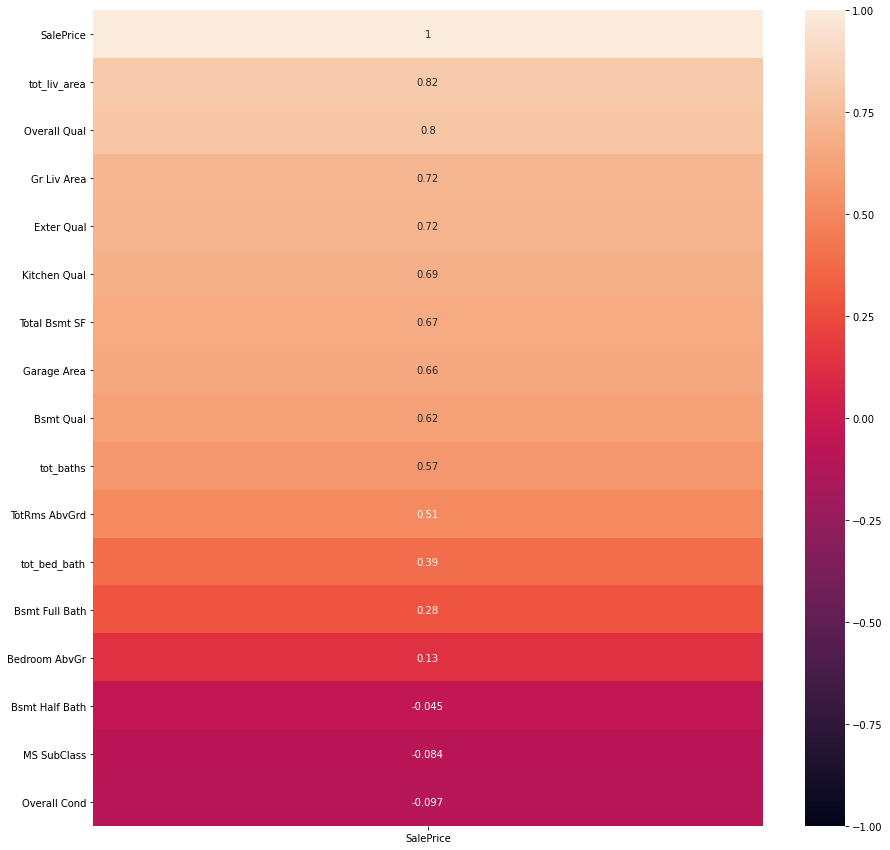

In [4191]:
# Creating a heatmap to see which variables correlate most with SalePrice column. Ignoring MS Subclass row because
# it should be categorical
plt.figure(figsize=(15, 15))
sns.heatmap(ames_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, vmin=-1, vmax=1);

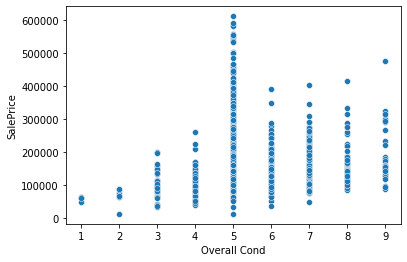

In [4192]:
# Scatterplot between overall cond and saleprice is not very linear. Note differentiation between condition and
# quality
sns.scatterplot(x = ames_train['Overall Cond'], y = ames_train['SalePrice']);

In [4193]:
# The majority of values are concentrated around 5-6
ames_train['Overall Cond'].describe()

count    2044.000000
mean        5.563601
std         1.105039
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: Overall Cond, dtype: float64

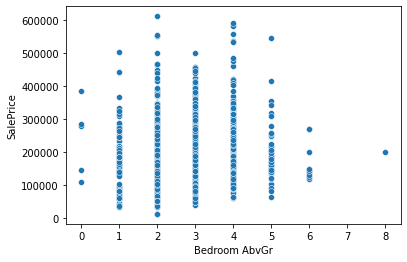

In [4194]:
# There's little correlation between Bedroom AbvGr and SalePrice
sns.scatterplot(x = ames_train['Bedroom AbvGr'], y = ames_train['SalePrice']);

In [4195]:
# Dropping the above two columns
ames_train.drop(columns=['Bedroom AbvGr', 'Overall Cond'], inplace=True)

In [4196]:
# ames_train.to_csv('./datasets/train_cleaned_x_vars.csv')
ames_train.to_csv('./datasets/train_cleaned_x_vars.csv')

### Applying Polynomial Features and Dummy Columns to Dataframe Subsets

In [4197]:
# Creating a list of x variable columns with numerical values
num_vars_train = [col for col in ames_train._get_numeric_data().columns]
num_vars_train.remove('MS SubClass') # MS Subclass is type int, but still categorical
num_vars_train.remove('SalePrice') 

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [4199]:
num_vars_train

['Overall Qual',
 'Exter Qual',
 'Bsmt Qual',
 'Total Bsmt SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Garage Area',
 'tot_baths',
 'tot_bed_bath',
 'tot_liv_area']

In [4200]:
# Generating Polynomial Features on only the numerical variables

X_num_train = ames_train[num_vars_train]

poly_train = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform numerical X variables.
X_overfit_train = poly.fit_transform(X_num_train)

In [4201]:
# Turning X_overfit into dataframe type
X_overfit_train = pd.DataFrame(X_overfit_train)

In [4202]:
X_overfit_train.shape

(2044, 104)

In [4203]:
ames_train.columns

Index(['MS SubClass', 'MS Zoning', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition', 'Bldg Type', 'Overall Qual',
       'Exter Qual', 'Bsmt Qual', 'BsmtFin Type 1', 'Total Bsmt SF',
       'Heating QC', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Kitchen Qual', 'TotRms AbvGrd', 'Garage Area', 'Paved Drive',
       'Sale Type', 'SalePrice', 'tot_baths', 'tot_bed_bath', 'tot_liv_area'],
      dtype='object')

In [4204]:
# Making a dataframe for all categorical columns

ames_categ_train = ames_train.drop(columns=num_vars_train)
ames_categ_train = ames_categ_train.drop(columns='SalePrice')

In [4205]:
ames_categ_train.head()

,MS SubClass,MS Zoning,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition,Bldg Type,BsmtFin Type 1,Heating QC,Paved Drive,Sale Type
0,60,RL,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRA,1Fam,GLQ,Ex,Y,WD
1,60,RL,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,1Fam,GLQ,Ex,Y,WD
2,20,RL,Lvl,AllPub,Inside,Gtl,NAmes,Norm,1Fam,GLQ,TA,Y,WD
3,60,RL,Lvl,AllPub,Inside,Gtl,Timber,Norm,1Fam,Unf,Gd,Y,WD
4,50,RL,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,1Fam,Unf,TA,N,WD


In [4206]:
# Listing out all the ames_categ variables
dummy_list = [x for x in ames_categ_train.columns]

In [4207]:
# Dummifying all categorical variables, including MS Subclass
ames_categ_train = pd.get_dummies(data=ames_categ_train, columns=dummy_list, drop_first=True)

In [4208]:
ames_categ_train.shape

(2044, 87)

In [4209]:
X_overfit_train.shape

(2044, 104)

In [4210]:
# Combining my preprocessed numerical and categorical sub-datasets. Adding reset_index to prevent 
# adding of more rows
X_complete_train = pd.concat([X_overfit_train, ames_categ_train.reset_index()], axis=1)

reset_index() code taken from this [page](https://stackoverflow.com/questions/50368145/pandas-concat-increases-number-of-rows)

In [4211]:
X_complete_train.shape

(2044, 192)

In [4212]:
X_complete_train.to_csv('./datasets/train_transformed_x_vars.csv')